## Compare weighted and unweighted models

This notebook reads the tab-separated file generated by [weighted_unweighted.do](../stata/weighted_unweighted.do), and plots it visually to make the coefficient estimates easy to compare. The graph below shows the odds ratio for each variable in the weighted and unweighted models.

Note that this is using a simple pweight in Stata, not a svyset dataset.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data = pd.read_table('../stata/wtunwt.tsv', sep='\t', skiprows=[0, 2, 3, 141, 142, 143, 144])
data = data[data.VARIABLES.apply(lambda x: not 'geographicCell' in x and not 'season' in x, 1)]
tb = data.VARIABLES.apply(lambda x: 'pubTransCount' in x or\
                              'CNTTDTR' in x\
                              or 'walkCount' in x\
                              or 'bikeCount' in x)
data.loc[tb, ['unweighted', 'unweighted_low', 'unweighted_high', 'weighted', 'weighted_low', 'weighted_high']] =\
    np.exp(50 * np.log(data.loc[tb, ['unweighted', 'unweighted_low', 'unweighted_high', 'weighted', 'weighted_low', 'weighted_high']]))

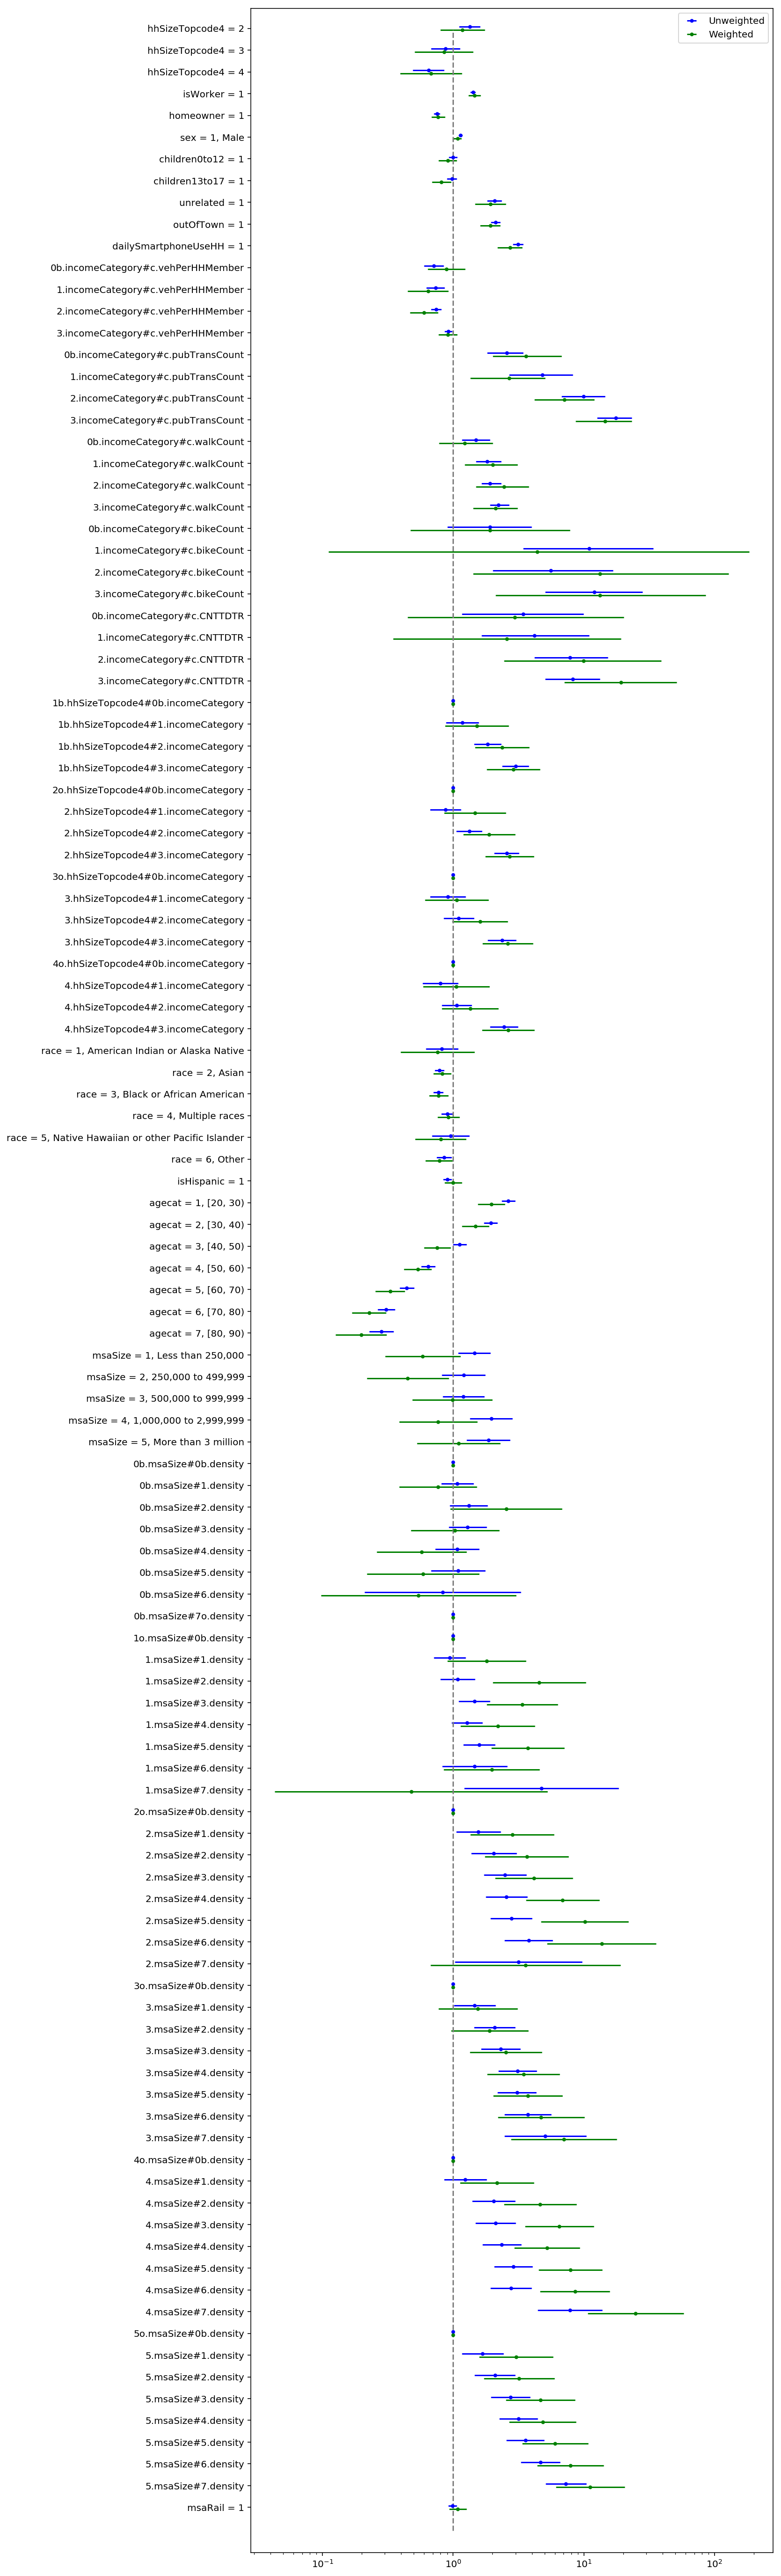

In [51]:
plt.figure(figsize=(10, 50))
y = -np.arange(len(data)) + len(data)
plt.plot([1, 1], [0, np.max(y)], '--', color='gray')
plt.errorbar(data.unweighted, y + 0.15,
             xerr=[data.unweighted - data.unweighted_low, data.unweighted_high - data.unweighted],
             color='blue', label='Unweighted', fmt='.')
plt.errorbar(data.weighted, y,
             xerr=[data.weighted - data.weighted_low, data.weighted_high - data.weighted],
             color='green', label='Weighted', fmt='.')
plt.yticks(y + 0.075, data.LABELS.fillna(data.VARIABLES))
# hmm, after all the trouble I went to to get odds ratios, I'm reporting them on a log scale?
plt.semilogx()
plt.ylim(-1, len(data) + 1)
plt.legend()
plt.savefig('../fig/wtunw.pdf', bbox_inches='tight')
